In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("spam.csv")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# Task to perform
# 1. Data Cleaning
# 2. EDA
# 3. Text Performing
# 4. Data Preprocessing
# 5. Model Building
# 6. Evaluate the model

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Observation : As we can see from above info outof 5 column 3 presents less number of data, so we have to drop this column

In [6]:
# drop the last 3 column
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Changing the name of the column
df.rename(columns={"v1":"Target","v2":"text"},inplace=True)

In [9]:
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# apply Lable Encoder on Target column
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df["Target"]=encoder.fit_transform(df["Target"])

In [12]:
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Checking null values 
df.isnull().sum()

Target    0
text      0
dtype: int64

In [14]:
# Checking duplicates
df.duplicated().sum()

403

In [15]:
#removing duplicates
df=df.drop_duplicates(keep="first")

In [16]:
df.shape

(5169, 2)

## 3. EDA

In [17]:
 df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Checking the total values of "ham" and "spam"
df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

Observation : Here 0 represent "ham" and 1 represent "spam"

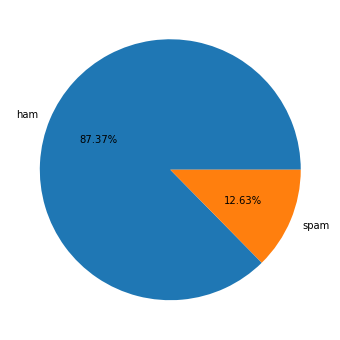

In [19]:
plt.figure(figsize=(12,6))
plt.pie(df["Target"].value_counts(), labels=["ham","spam"], autopct="%0.2f%%")
plt.show()

Observation : From above plot we can say that 87.37% of data is "ham" and 12.63% is "spam",so we can say that there is slight imbalance in our data

## 3. Text performance

In [20]:
import nltk

In [21]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swapnil123\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# converting text column in numeric value
df["text"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: text, Length: 5169, dtype: int64

In [23]:

df["num_characters"]=df["text"].apply(len)

In [24]:
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df["text"].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, �_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [26]:
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [29]:
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
# ham
df[df["Target"] ==0][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# spam
df[df["Target"] ==1][["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


Observation : From comparing both the description for ham and spam we can consider that spam sms are slightly big as compared to ham sms

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

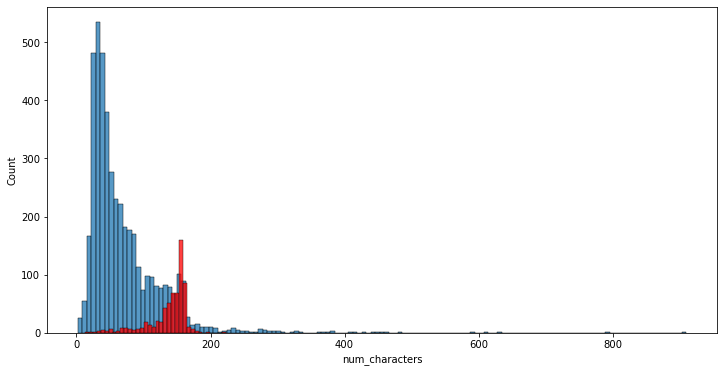

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"]== 0]["num_characters"])
sns.histplot(df[df["Target"]== 1]["num_characters"],color="red")

Observation : From above plot we can say that most of the character are used in spam sms while less number of character are use in ham sms

<AxesSubplot:xlabel='num_words', ylabel='Count'>

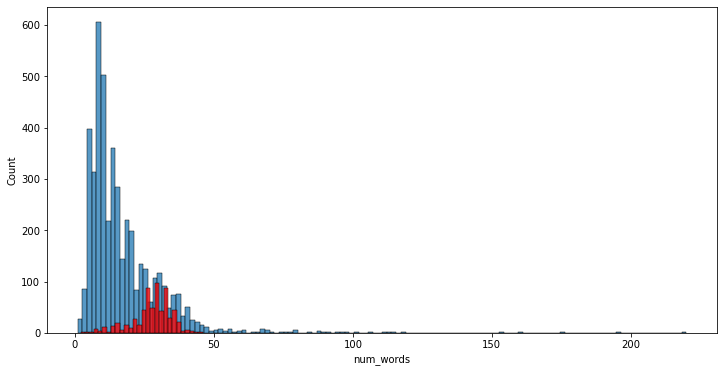

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["Target"]== 0]["num_words"])
sns.histplot(df[df["Target"]== 1]["num_words"],color="red")

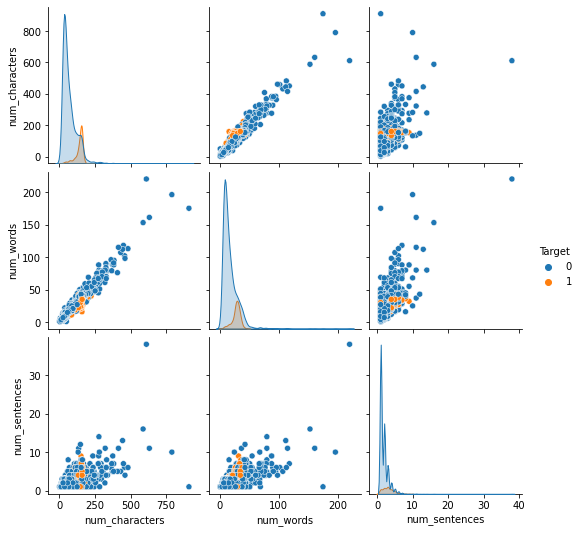

In [36]:
sns.pairplot(df,hue="Target")

<AxesSubplot:>

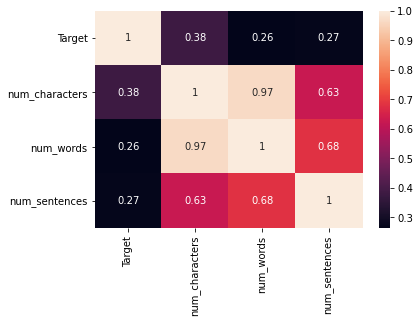

In [37]:
# finding correlation in data
sns.heatmap(df.corr(),annot=True)

Observation : Form above heatmap num_characters, num_words and num_sentences are highly correlated with each other

## 5. Data Preprocessing
* Lower Case
* Tokenization
* Removing special character
* Removing stop words and punctuations
* Stemming

In [38]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text= y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text= y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [39]:
 nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swapnil123\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords

In [41]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation 

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('machine learning')

'machine learn'

In [44]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [46]:
df["transformed_text"]=df["text"].apply(transform_text)

In [47]:
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
!pip install wordcloud

In [49]:
from wordcloud import WordCloud

In [50]:
wc= WordCloud(width=500,height=500,font_step=10,background_color='white')

In [51]:
spam_wc= wc.generate(df[df["Target"]==1]["transformed_text"].str.cat(sep=""))

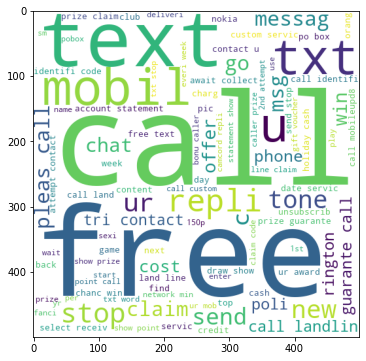

In [52]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

Observation : The words which are come inside spam sms are shown above

In [53]:
ham_wc= wc.generate(df[df["Target"]==0]["transformed_text"].str.cat(sep=""))

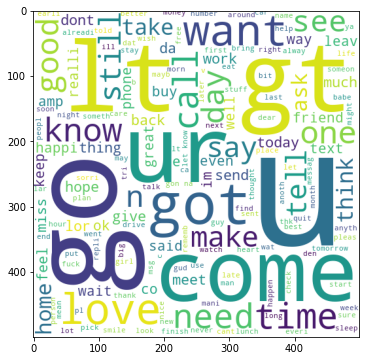

In [54]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

Observation : The words which comes inside ham sms are shown above

In [55]:
#df[df["Target"]==1]
#df[df["Target"]==1]["transformed_text"]

df[df["Target"]==1]["transformed_text"].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [56]:
spam_words=[]
for msg in df[df["Target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_words.append(word)

In [57]:
spam_words

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [58]:
len(spam_words)

9941

In [59]:
from collections import Counter
Counter(spam_words)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

C:\Users\Swapnil123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


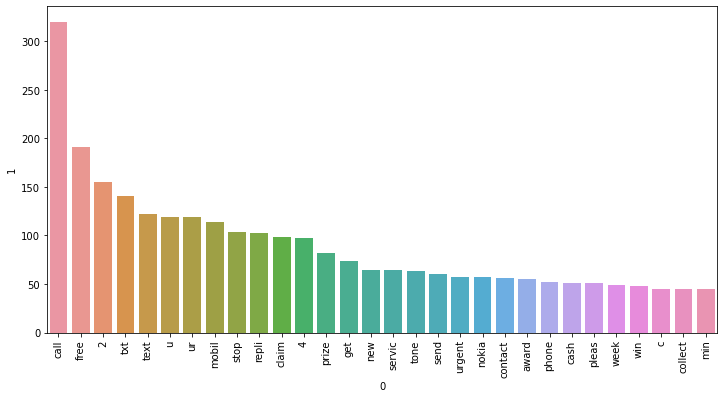

In [60]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(spam_words).most_common(30))[0],pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation="vertical")
plt.show()

In [61]:
ham_words=[]
for msg in df[df["Target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_words.append(word)

In [62]:
len(ham_words)

35303

In [63]:
ham_words

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

C:\Users\Swapnil123\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


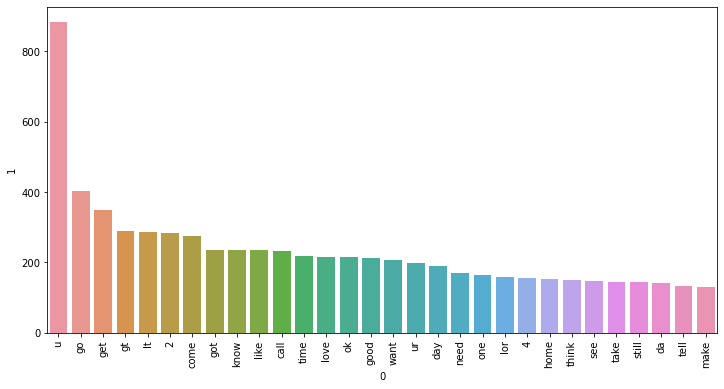

In [64]:
plt.figure(figsize=(12,6))
sns.barplot(pd.DataFrame(Counter(ham_words).most_common(30))[0],pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 6. Model Building

In [194]:
# convert the 'transformed_text' column into vector form
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features=3000)

In [195]:
x= cv.fit_transform(df['transformed_text']).toarray()

In [197]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x= scaler.fit_transform(x)

In [198]:
x.shape

(5169, 3000)

In [199]:
y= df["Target"].values

In [200]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.8,random_state=10)

In [203]:
print('Train set of features:',xtrain.shape)
print('Test set of features:',xtest.shape)
print('Train for target:',ytrain.shape)
print('Test for target:',ytest.shape)

Train set of features: (4135, 3000)
Test set of features: (1034, 3000)
Train for target: (4135,)
Test for target: (1034,)


In [204]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [205]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [206]:
#GaussianNB
gnb.fit(xtrain,ytrain)
ypred1 = gnb.predict(xtest)
print(accuracy_score(ypred1,ytest))

print(confusion_matrix(ypred1,ytest))

print(precision_score(ypred1,ytest))

0.8636363636363636
[[784  17]
 [124 109]]
0.8650793650793651


In [207]:
#multinomialNB
mnb.fit(xtrain,ytrain)
ypred2 = mnb.predict(xtest)
print(accuracy_score(ypred2,ytest))

print(confusion_matrix(ypred2,ytest))

print(precision_score(ypred2,ytest))

0.97678916827853
[[900  16]
 [  8 110]]
0.873015873015873


In [208]:
#bernoulliNB
bnb.fit(xtrain,ytrain)
ypred3 = bnb.predict(xtest)
print(accuracy_score(ypred3,ytest))

print(confusion_matrix(ypred3,ytest))

print(precision_score(ypred3,ytest))

0.9748549323017408
[[907  25]
 [  1 101]]
0.8015873015873016


Observation : 
* From above 3 model, 'multinomialNB' fit best in our model,but since precision_score matters in our model. Hence we will try to improve precison_score  

In [209]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [210]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [211]:
clfs = {
    'LRC':lrc,
    'SVC':svc,
    'NB':mnb,
    'KNC':knc,
    'DTC':dtc,
    'RFC':rfc,
    'Adaboost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBC':gbc,
    'XGB':xgb
}

In [212]:
def train_classifier(clf,xtrain,ytrain,xtest,ytest):
    clf.fit(xtrain,ytrain)
    ypred = clf.predict(xtest)
    accuracy= accuracy_score(ytest,ypred)
    precision= precision_score(ytest,ypred)
    
    return accuracy,precision

In [213]:
train_classifier(svc,xtrain,ytrain,xtest,ytest)

(0.9584139264990329, 0.8878504672897196)

In [214]:
accuracy_scores= []
precision_scores= []

for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf,xtrain,ytrain,xtest,ytest)

    print("For", name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


    

For LRC
Accuracy 0.9632495164410058
Precision 0.9680851063829787
For SVC
Accuracy 0.9584139264990329
Precision 0.8878504672897196
For NB
Accuracy 0.97678916827853
Precision 0.9322033898305084
For KNC
Accuracy 0.9119922630560928
Precision 1.0
For DTC
Accuracy 0.9361702127659575
Precision 1.0
For RFC
Accuracy 0.9748549323017408
Precision 1.0
For Adaboost
Accuracy 0.9526112185686654
Precision 0.8811881188118812
For BgC
Accuracy 0.9709864603481625
Precision 0.9705882352941176
For ETC
Accuracy 0.9758220502901354
Precision 0.9902912621359223
For GBC
Accuracy 0.9497098646034816
Precision 1.0


C:\Users\Swapnil123\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:09:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
For XGB
Accuracy 0.9671179883945842
Precision 0.9693877551020408


In [162]:
performance_df= pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy":accuracy_scores,"Precision":precision_scores}).sort_values("Precision",ascending=False)

In [164]:
performance_df

,Algorithm,Accuracy,Precision
3,KNC,0.911025,1.000000
4,DTC,0.936170,1.000000
5,RFC,0.970019,1.000000
8,ETC,0.970986,1.000000
9,GBC,0.949710,1.000000
7,BgC,0.968085,0.969697
10,XGB,0.967118,0.969388
0,LRC,0.970986,0.961538
6,Adaboost,0.952611,0.881188
2,NB,0.973888,0.872180


In [165]:
performance_df1 = pd.melt(performance_df , id_vars="Algorithm")

In [166]:
performance_df1

,Algorithm,variable,value
0,KNC,Accuracy,0.911025
1,DTC,Accuracy,0.936170
2,RFC,Accuracy,0.970019
3,ETC,Accuracy,0.970986
4,GBC,Accuracy,0.949710
5,BgC,Accuracy,0.968085
6,XGB,Accuracy,0.967118
7,LRC,Accuracy,0.970986
8,Adaboost,Accuracy,0.952611
9,NB,Accuracy,0.973888


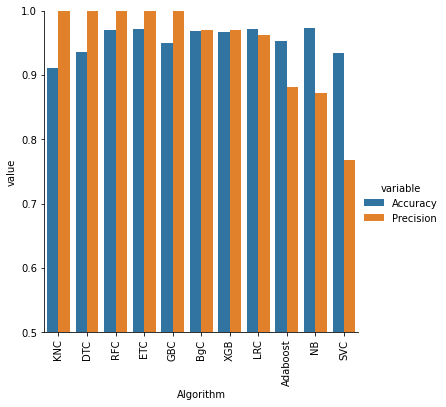

In [167]:
sns.catplot(x="Algorithm",y="value",data=performance_df1,hue="variable",kind="bar",height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

In [168]:
# model improvement
# by using max_feature in countvectorize

In [189]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [192]:
new_df= performance_df.merge(temp_df,on='Algorithm')


In [222]:
temp_df_scaled= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [223]:
new_df_scaled = new_df.merge(temp_df_scaled,on='Algorithm')

In [224]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KNC,0.911025,1.000000,0.914894,1.000000,0.911992,1.000000
1,DTC,0.936170,1.000000,0.936170,1.000000,0.936170,1.000000
2,RFC,0.970019,1.000000,0.974855,1.000000,0.974855,1.000000
3,ETC,0.970986,1.000000,0.975822,0.990291,0.975822,0.990291
4,GBC,0.949710,1.000000,0.949710,1.000000,0.949710,1.000000
5,BgC,0.968085,0.969697,0.970986,0.970588,0.970986,0.970588
6,XGB,0.967118,0.969388,0.967118,0.969388,0.967118,0.969388
7,LRC,0.970986,0.961538,0.970986,0.952830,0.963250,0.968085
8,Adaboost,0.952611,0.881188,0.952611,0.881188,0.952611,0.881188
9,NB,0.973888,0.872180,0.978723,0.906250,0.976789,0.932203


Observation : By adding max_features and scaling we get best accuracy and precision form random forest classifier,so we use random forest classifier as our module

In [225]:
# Voting Classifier
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [233]:
voting = VotingClassifier(estimators=[('kn',knc),('dt',dtc),('rf',rfc),('et',etc),('gb',gbc)],voting='soft')

In [234]:
voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('kn', KNeighborsClassifier()),
                             ('dt', DecisionTreeClassifier(max_depth=5)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('gb',
                              GradientBoostingClassifier(n_estimators=50,
                                                         random_state=2))],
                 voting='soft')

In [235]:
y_pred= voting.predict(xtest)
print('Accuracy',accuracy_score(ytest,y_pred))
print('Precision',precision_score(ytest,y_pred))

Accuracy 0.9545454545454546
Precision 1.0


Observation : By adding Voting Classifier still the accuracy is not more than Rnadom Forest Classifier, so finallly we can go with the RFC module